# Week4 - Homework

- Execute the below code, then answer the numbered questions.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [2]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

**select_dtypes(include=['number'] is used to select the numerical features and convert them to the list
whereas select_dtypes(exclude=['number'] is used to select the categorical features and convert them to the list**

In [3]:
# insert code here

# select_dtypes function with include and exclude parameters for the features except target column
numerical_features = df[features].select_dtypes(include=['number']).columns.tolist()
categorical_features = df[features].select_dtypes(exclude=['number']).columns.tolist()

# Print the numerical and categorical features
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['condition', 'odometer', 'auction_value']
Categorical Features: ['make', 'transmission', 'state']


**Numerical features are condition, odometer and auction_value. Categorical features are make, transmission and state.**

## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

**Import all the libraries required for pipelines like Pipeline, ColumnTransformer, SimpleImputer, OneHotEncoder, 
StandardScaler.**

In [4]:
from sklearn.pipeline import Pipeline # import pipeline
from sklearn.compose import ColumnTransformer # import column transformer for transforming the data.
from sklearn.impute import SimpleImputer # import simple imputer for imputing missing values
from sklearn.preprocessing import OneHotEncoder # used for representing categorical columns as numeric.
from sklearn.preprocessing import StandardScaler # used for standardizing the values

In [5]:
df.isnull().sum() # Get the sum of missing values for each column

make             891
transmission     949
state            903
condition        882
odometer         877
auction_value    948
selling_price      0
dtype: int64

In [6]:
# insert code here
# create a pipeline that imputes missing values of numerical features with median and then standardizes the values

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

**The above code shows how the pipeline that imputes missing values in numerical features and also standardize for the same using StandardScaler() is shown.**

## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [7]:
# insert code here
# create a pipeline that imputes missing values of categorical features with most frequent value
# and then used OneHotEncoder to convert the data to numerical arrays

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

**The above code shows how the pipeline that imputes missing values in categorical features and also use OneHotEncoder to convert the data to numerical arrays is shown.**

**Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.**

In [8]:
cat_processing_pipeline = ColumnTransformer(transformers=[('create_dummies', cat_pipeline, categorical_features)])
cat_processing_pipeline

ColumnTransformer(transformers=[('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['make', 'transmission', 'state'])])

**The above code is used to column transform the categorical features.**

**The below code is used for processing the data for categorical features**

In [9]:
cat_data_processing_pipeline = Pipeline(steps=[
    ('data_processing', cat_processing_pipeline)
])

cat_data_processing_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['make', 'transmission',
                                                   'state'])]))])

**The below code is used to fit transform the processing pipeline to the training dataset.**

In [10]:
cat_transformed_data = cat_data_processing_pipeline.fit_transform(X_train)
cat_transformed_data

<7244x41 sparse matrix of type '<class 'numpy.float64'>'
	with 14213 stored elements in Compressed Sparse Row format>

In [11]:
cat_transformed_data.dtype # get the type of transformed data

dtype('float64')

In [12]:
cat_transformed_data_array = cat_transformed_data.toarray() # the transformed data is converted to array

df_cat_transform = pd.DataFrame(cat_transformed_data_array) # the above array is converted into dataframe 

print(df_cat_transform.shape) # print the shape of the transformed dataframe

(7244, 41)


In [13]:
print(df_cat_transform.dtypes) #print the data types of the transformed data

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
dtype: object


**By the above output, I can say that all the columns are numeric**

In [14]:
df_cat_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7244 entries, 0 to 7243
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7244 non-null   float64
 1   1       7244 non-null   float64
 2   2       7244 non-null   float64
 3   3       7244 non-null   float64
 4   4       7244 non-null   float64
 5   5       7244 non-null   float64
 6   6       7244 non-null   float64
 7   7       7244 non-null   float64
 8   8       7244 non-null   float64
 9   9       7244 non-null   float64
 10  10      7244 non-null   float64
 11  11      7244 non-null   float64
 12  12      7244 non-null   float64
 13  13      7244 non-null   float64
 14  14      7244 non-null   float64
 15  15      7244 non-null   float64
 16  16      7244 non-null   float64
 17  17      7244 non-null   float64
 18  18      7244 non-null   float64
 19  19      7244 non-null   float64
 20  20      7244 non-null   float64
 21  21      7244 non-null   float64
 22  

**By the above output, I can say that all the columns are numeric.**

In [15]:
df_cat_transform.shape[1] # get the number of columns in transformed data

41

**The transformed data has 41 columns**

## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [16]:
# insert code here

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_features),
                                                      ('create_dummies', cat_pipeline, categorical_features)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['condition', 'odometer', 'auction_value']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['make', 'transmission', 'state'])])


**The above code is used for processing pipeline of both numerical and categorical features.**

In [17]:
data_processing_pipeline = Pipeline(steps=[
    ('data_processing', processing_pipeline)
])

data_processing_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['make', 'transmission',
                                                   'state'])]))])

**The above code is used for preprocessing the data combining both the numerical and categorical features.**

**The below code is used to fit transform the processing pipeline to the training dataset.**

In [18]:
data_transformed = data_processing_pipeline.fit_transform(X_train)
data_transformed

<7244x44 sparse matrix of type '<class 'numpy.float64'>'
	with 35945 stored elements in Compressed Sparse Row format>

In [19]:
data_transformed.dtype # get the data type of transformed data

dtype('float64')

In [20]:
data_transformed_array = data_transformed.toarray() # the transformed data is converted to array

df_transformed = pd.DataFrame(data_transformed_array) # the above array is converted into dataframe 

print(df_transformed.shape) # print the shape of the transformed dataframe

(7244, 44)


In [21]:
print(df_transformed.dtypes) # print the data types of the transformed data

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
dtype: object


In [22]:
print(df_transformed.isnull().sum()) # get the sum of missing values of all the features

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
dtype: int64


**From the above code, I can say that there are no missing values in the transformed data.**

In [23]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7244 entries, 0 to 7243
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7244 non-null   float64
 1   1       7244 non-null   float64
 2   2       7244 non-null   float64
 3   3       7244 non-null   float64
 4   4       7244 non-null   float64
 5   5       7244 non-null   float64
 6   6       7244 non-null   float64
 7   7       7244 non-null   float64
 8   8       7244 non-null   float64
 9   9       7244 non-null   float64
 10  10      7244 non-null   float64
 11  11      7244 non-null   float64
 12  12      7244 non-null   float64
 13  13      7244 non-null   float64
 14  14      7244 non-null   float64
 15  15      7244 non-null   float64
 16  16      7244 non-null   float64
 17  17      7244 non-null   float64
 18  18      7244 non-null   float64
 19  19      7244 non-null   float64
 20  20      7244 non-null   float64
 21  21      7244 non-null   float64
 22  

## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

**The below code is to add the linear regression model to the pipeline.**

In [24]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])
modeling_pipeline.fit(X_train, y_train) # fit the training dataset for pipeline model

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['make', 'transmission',
                                                   'state'])])),
                ('lm', LinearRegression())])

In [25]:
selling_price_predictions = modeling_pipeline.predict(X_test) # predict the selling price

**The below code is used to find the mean_squared_error for the actual test data and predicted data.**

In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, selling_price_predictions)
mse

6998122.101547145

**The below code is used to find the root_mean_squared_error which is the sqaure root of mean_squared_error.**

In [27]:
import numpy as np
rmse = np.sqrt(mse)
rmse

2645.396397810193

**The below code is used to find the R-squared for the actual test data and predicted data.**

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, selling_price_predictions)
r2

0.8838274412917084

**From the above code, I can say that this model has an accuracy of 88 percent which can be considered as a good fit.**

## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

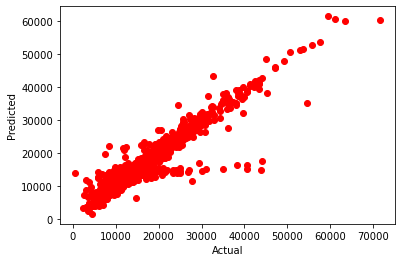

In [29]:
# insert code here

# The below code is used to plot between actual and predicted values
import matplotlib.pyplot as plt
plt.plot(y_test, selling_price_predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

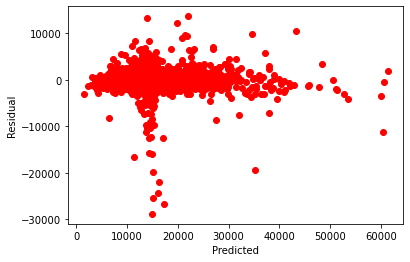

In [30]:
# The below code is used to plot the residuals
plt.plot(selling_price_predictions, selling_price_predictions - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

Insert description here.

- The above model can be determined as a perfect model when the residuals would be 0 for all values.  
- Some of the information is not picked by the residuals, it can be a feature which we may have no access, and it may be noise (meaningless data) in the data.

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

**The below code implements the ridge regression model with an alpha value of 100.**

In [31]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=100))])
modeling_pipeline_ridge.fit(X_train, y_train) # fit the training dataset
modeling_pipeline_ridge['ridge'].coef_ # ridge regression coefficients

array([ 9.02786677e+02, -2.25028852e+02,  6.85997275e+03, -3.29171110e+02,
       -4.28890863e+02, -3.36314025e+02, -3.07566832e+02, -2.36888763e+02,
       -7.96923058e+02, -9.61136367e+02, -6.89133823e+02, -2.15603550e+02,
       -3.02558470e+02,  3.55083770e+02,  3.95839103e+02,  1.78575018e+01,
        8.80105155e+01, -8.38199050e+01,  1.23308740e+02, -3.15859949e+02,
        7.39305590e+00, -2.42430931e+02, -3.75025022e+02,  1.27260823e+02,
       -7.68705408e+01,  3.90364689e+02,  1.34460352e+02, -1.57903684e+02,
        1.30759942e+02, -6.21722897e+01, -5.10951048e+00,  3.05570447e+02,
       -3.22288264e+02, -1.32482404e+02, -8.83878928e+01, -1.10312101e+02,
       -4.20455432e+02, -1.73303315e+02,  3.06242057e+02,  1.47493945e+02,
       -6.03854342e+01, -1.11112938e+02,  1.42735184e+01,  9.45228992e+01])

In [32]:
modeling_pipeline['lm'].coef_ # linear regression model coefficients

array([  887.27576825,  -225.88035222,  6817.22034435, -2031.21320804,
       -2258.08086443, -2066.5171836 , -1977.60505844, -1939.85918185,
       -2645.77635028, -2881.12970838, -2439.73349705, -1881.48899592,
        -550.68503187,   154.6563302 ,   720.37924956,  -110.31939002,
         -31.25678524,  -823.6350036 ,    83.03883838,  -804.38607562,
         -31.26300376,  -920.26226766,  -849.52479318,   109.44637755,
        -191.16096484,   441.92452207,   575.46185069,  -341.51288343,
         257.63433427,  -274.74451994,  -546.95092904,   301.03273065,
        -816.96424368,  -403.11084964,  -793.08276483,  -231.64913934,
       -1843.22789155,  -629.6019474 ,   347.37964313,    91.24066628,
        -454.03516013,  -295.42181856,  -100.24198962,   -27.36533866])

In [33]:
selling_price_predictions_ridge = modeling_pipeline_ridge.predict(X_test) # predict the selling price

In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, selling_price_predictions_ridge)
r2

0.8825299600422705

### Now to evaluate different  𝜆 values

**We need to evaluate a gradient of $\lambda$ values to determine the best one to use.**

**The below code is used to process the pipeline, fit the training dataset, training and testing score.**

In [35]:
from collections import defaultdict
alphas = [0, 1, 2, 5, 10, 50, 55, 60,70,80]

ridge_results = defaultdict(dict)

for alph in alphas:
    modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=alph))])
    modeling_pipeline_ridge.fit(X_train, y_train)
    ridge_results['coefficients'][alph] = modeling_pipeline_ridge['ridge'].coef_
    ridge_results['training score'][alph] = modeling_pipeline_ridge.score(X_train, y_train)
    ridge_results['test score'][alph] = modeling_pipeline_ridge.score(X_test, y_test)

print('Done')

Done


**The below code is used to plot the alpha and coefficient amount**

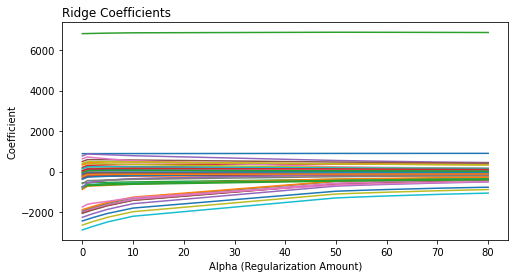

In [36]:
coefficients_ridge = pd.DataFrame.from_dict(ridge_results['coefficients'])
coefficients_ridge = coefficients_ridge.reset_index()
coefficients_ridge = coefficients_ridge.rename(columns={'index':'coefficient_nbr'})
coefficients_ridge = coefficients_ridge.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

(
coefficients_ridge.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient')
    .plot(figsize=(8,4),legend=False)
)

plt.title('Ridge Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.show()

### Changes in $R^2$

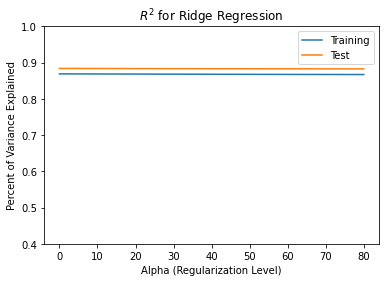

In [37]:
ridge_training_r2 = pd.Series(ridge_results['training score'])
ridge_test_r2 = pd.Series(ridge_results['test score'])

ridge_training_r2.plot()
ridge_test_r2.plot()
plt.title('$R^2$ for Ridge Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.ylim(0.4, 1)
plt.show()

**The above code is used to plot the changes in $R^2$, alpha and percent of variance. By looking at the training and test lines, test line is above the training line which determines model is not overfitting and it is taking into care of the underlying relationships effectively. I can say that this can be the suitable model for this data.**